.
# Interactive Visualization

videos von https://github.com/vega/voyager anschauen und im optimalfall was finden was den vega-code exportiert

# Jupyter-Widgets

Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc. Widgets can be used to build interactive data exploration and interactive GUIs.

In [100]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [101]:
def f(slope, intercept):
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, num=1000)
    ax.plot(x, slope * x + intercept)
    ax.set_ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, slope=(-2.0, 2.0), intercept=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=2.0, min=-2.0), FloatSlider(value=0.0, d…


Widgets have their own display `repr` which allows them to be displayed using IPython’s display framework. Constructing and returning an `IntSlider` automatically displays the widget.

In [85]:
from IPython.display import display
widgets.IntSlider()

IntSlider(value=0)

Widgets can also be displayed by calling `display`. If you display the same widget twice, their front-end-representation will stay in sync:

In [87]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [88]:
display(w)

IntSlider(value=0)

Note that we can get its `value`, however if you simply return it its not interactive!

In [102]:
w.value

73

.
## Linking two similar widgets

If you need to display the same value two different ways, you’ll have to use two different widgets. To synchronize the values of the two widgets, you can use the `jslink` function to link two properties together:

In [92]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

By binding widgets, we can also show our value from before interactively!

In [104]:
display(w)

IntSlider(value=52)

In [105]:
w2 = widgets.Label()
widgets.jslink((w, 'value'), (w2, 'value'))
display(w2)

Label(value='')

## The `interact`-function

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use interact, you need to define a function that you want to explore.

In [106]:
def f(x):
    return x**2

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter. When this slider is moved, the function is called (over and over again) with the current value of x.

In [25]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

If you pass `True` or `False`, `interact` will generate a checkbox:

In [26]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

If you pass a string, `interact` will generate a text area.

In [27]:
interact(lambda x: x, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

If you pass lists or dictionaries (*not tuples!*), it will make a Dropdown-Menu:

In [28]:
interact(lambda x: x, x={'one':1,'two':2});

interactive(children=(Dropdown(description='x', options={'one': 1, 'two': 2}, value=1), Output()), _dom_classe…

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments. Note also that passing a `float` will produce a different kind of slider: The `FloatSlider`:

In [29]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [30]:
#ipywidgets.fixed values will not lead to an interactive element:
@interact(x=True, y=fixed(1.0)) 
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

### Abbreviations

So far, we passed `ints`, `floats`, `booleans`, `strings`, `lists` and `dicts`. These are in fact only **abbreviations** for the respective widgets.

In [31]:
interact(lambda x:x, x=widgets.IntSlider(min=-10,max=30,step=1,value=10));

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

For IntSliders and FloatSliders, you can also pass a tuple of `(min, max)`, `(min, max, step)`:

In [32]:
interact(lambda x:x**2.1, x=(5.99,9.01,0.01));

interactive(children=(FloatSlider(value=7.49, description='x', max=9.01, min=5.99, step=0.01), Output()), _dom…

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`

In [33]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    return x

interactive(children=(FloatSlider(value=5.5, description='x', max=20.0, step=0.5), Output()), _dom_classes=('w…

Using the explicit variant gives you more control. For example, you can turn off continuous update if you have a slow function:

In [117]:
def slow_function(i):
    print(int(i),list(x for x in range(int(i)) if
                str(x)==str(x)[::-1] and
                str(x**2)==str(x**2)[::-1]))
    return

interact(slow_function, 
         i= FloatSlider(
             value=2e5,
             min=1e5,
             max=1e7,
             step=1e5,
             description='Test:',
             disabled=False,
             continuous_update=False,    #continuous_update=False will make it listen only to MouseRelease-Events
             orientation='horizontal',
             readout=True,
             readout_format='.1f')
        );

interactive(children=(FloatSlider(value=200000.0, continuous_update=False, description='Test:', max=10000000.0…

For very slow functions, there's also interact_manual, that adds a button:

In [118]:
interact_manual(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5));

interactive(children=(FloatSlider(value=100000.0, description='i', max=10000000.0, min=100000.0, step=100000.0…

## Other widgets

There are in fact quite many Jupyter Widgets!

In [11]:
from IPython.display import IFrame

IFrame(
    "https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html",
    width="100%",
    height=400,
)

## Exercise

In [120]:
#TODO ADD EXERCISE

## `interactive`

When you want to reuse the widgets you're working with, you use `interactive` rather than `interact`:

In [63]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [66]:
w = interactive(f, a=10, b=20)
type(w)

ipywidgets.widgets.interaction.interactive

In [67]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [72]:
w.children

(IntSlider(value=22, description='a', max=30, min=-10),
 IntSlider(value=23, description='b', max=60, min=-20),
 Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '45'}, 'metadata': {}},)))

In [74]:
w.kwargs, w.result

({'a': 22, 'b': 23}, 45)

## Example

In [64]:
import seaborn as sns
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


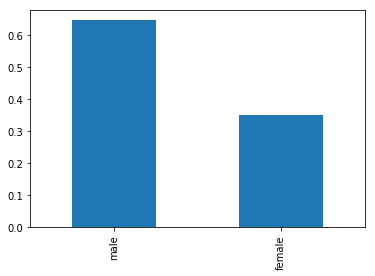

In [59]:
(titanic['Sex'].value_counts()/titanic['Sex'].count()).plot(kind='bar');

In [58]:
def plot_sex_distribution(dataset, agerange):
    dataset = dataset[dataset['Age'].between(agerange[0], agerange[1])]
    (dataset['Sex'].value_counts()/dataset['Sex'].count()).plot(kind='bar')
    
interactive(plot_sex_distribution, dataset=fixed(titanic), agerange=widgets.FloatRangeSlider(min=titanic['Age'].min(), max=titanic['Age'].max()))

interactive(children=(FloatRangeSlider(value=(20.315, 60.105), description='agerange', max=80.0, min=0.42), Ou…

## Exercise

In [119]:
#TODO ADD EXERCISE!!

## More

### Arguments that are dependent on each other

Arguments that are dependent on each other can be expressed manually using `observe`. See the following example, where one variable is used to describe the bounds of another.

In [80]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

### Flickering and jumping output

On occasion, you may notice interact output flickering and jumping, causing the notebook scroll position to change as the output is updated. The interactive control has a layout, so we can set its height to an appropriate value (currently chosen manually) so that it will not change size as it is updated.

In [ ]:
def f(slope, intercept):
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, num=1000)
    ax.plot(x, slope * x + intercept)
    ax.set_ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, slope=(-2.0, 2.0), intercept=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

!!! https://ipywidgets.readthedocs.io/en/stable/embedding.html

### Human in the loop

* script das bspw dinge von der API lädt, dann mir in einer multiselect-box-anzeigt, und ich dann die anwählen kann und mit denen weiterarbeitet
* zeige ne Kurve von mehreren VPs, mach p-hacking by having a slider der entscheidet wie viele Standardabewichungen entfernt es sein darf (mention that this is not for papers, duh)

# A quick look at Altair
Unfortunately, we don't have time here to look into the new plotting package `Altair`. However, we have a link to full tutorial in further readings. The cool thing is that once you understood the *Grammar of Graphics* you will be able to figure out any plotting package that follows its ideas in no time!

https://altair-viz.github.io/user_guide/interactions.html

In [38]:
import vega_datasets
cars = vega_datasets.data.cars()
cars = cars.fillna(cars.median())
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [39]:
import altair as alt

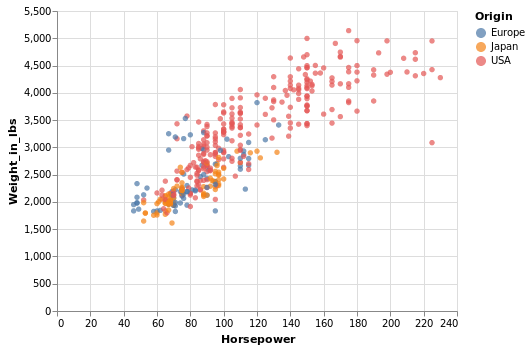

In [41]:
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Weight_in_lbs',
    color='Origin'
).interactive()

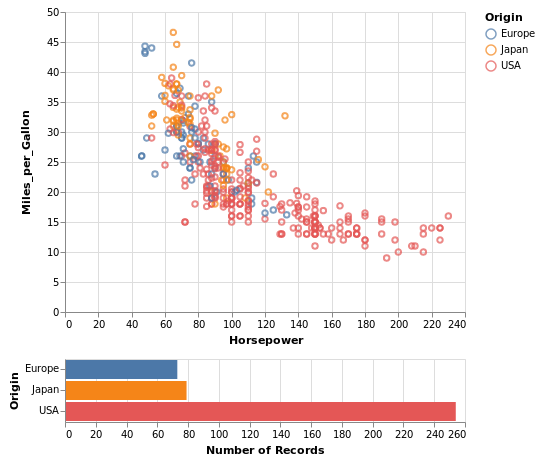

In [24]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=source)

# Further Readings
Jake VanderPlas' full tutorial on Altair.

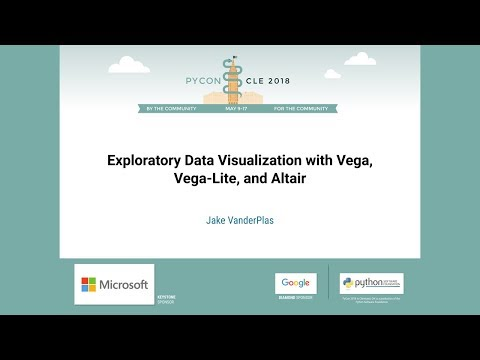

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('ms29ZPUKxbU')